In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
26,447 cases (7 day average) as of Thu 08 Jul, +812.6 since Wed 07 Jul
460 hospitalised (7 day average) as of Sun 11 Jul, +16.0 since Sat 10 Jul
21 died (7 day average) as of Thu 08 Jul, +0.9 since Wed 07 Jul


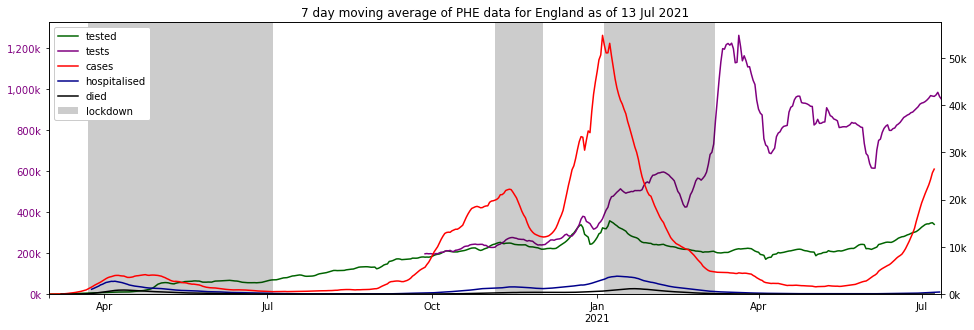

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

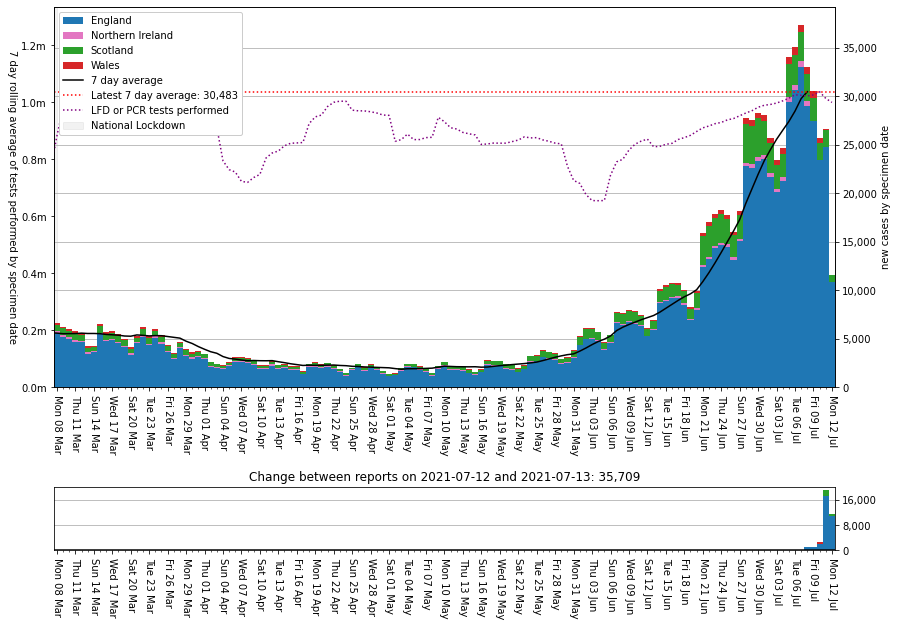

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

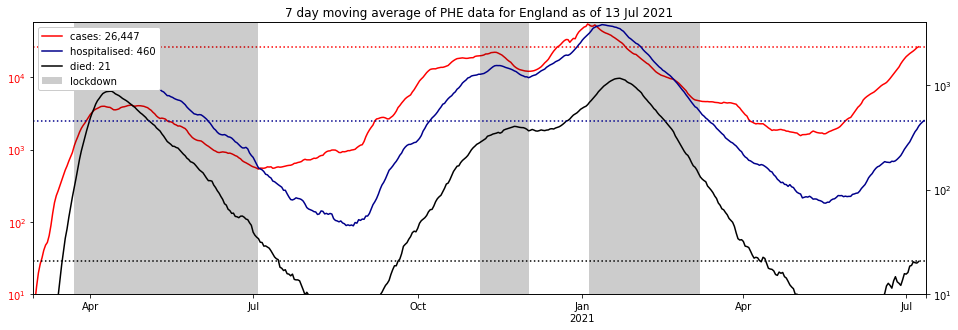

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

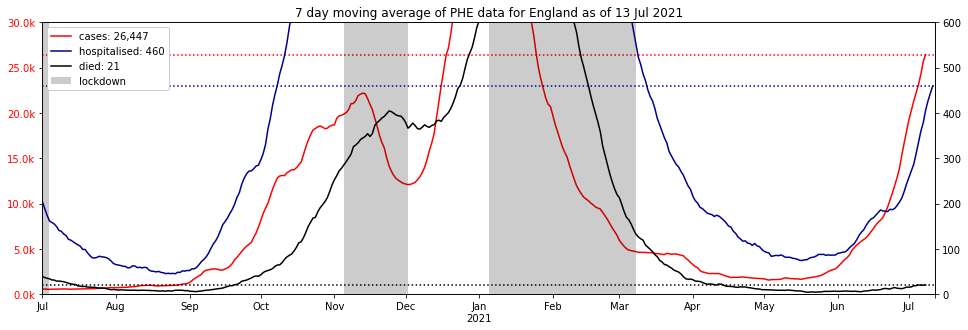

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=30_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=600)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,12 Jul 21,"+29,304,113","+38,574,387","+29,304,113","+99,817","+45,184","+99,817"
Northern Ireland,12 Jul 21,"+943,778","+1,186,295","+943,778","+1,764",+606,"+1,764"
Scotland,12 Jul 21,"+2,903,557","+3,941,571","+2,903,557","+10,286","+7,163","+10,286"
Wales,12 Jul 21,"+1,846,043","+2,275,764","+1,846,043","+13,493","+1,343","+13,493"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,29304113.0,38574387.0,9270274.0,56286961,52.061992,16.469665,31.468343
1,Northern Ireland,N92000002,943778.0,1186295.0,242517.0,1893667,49.838646,12.806740,37.354614
2,Scotland,S92000003,2903557.0,3941571.0,1038014.0,5463300,53.146578,18.999762,27.853660
3,Wales,W92000004,1846043.0,2275764.0,429721.0,3152879,58.551026,13.629480,27.819495


'partial: 45,978,017 (68.8%), full: 34,997,491'

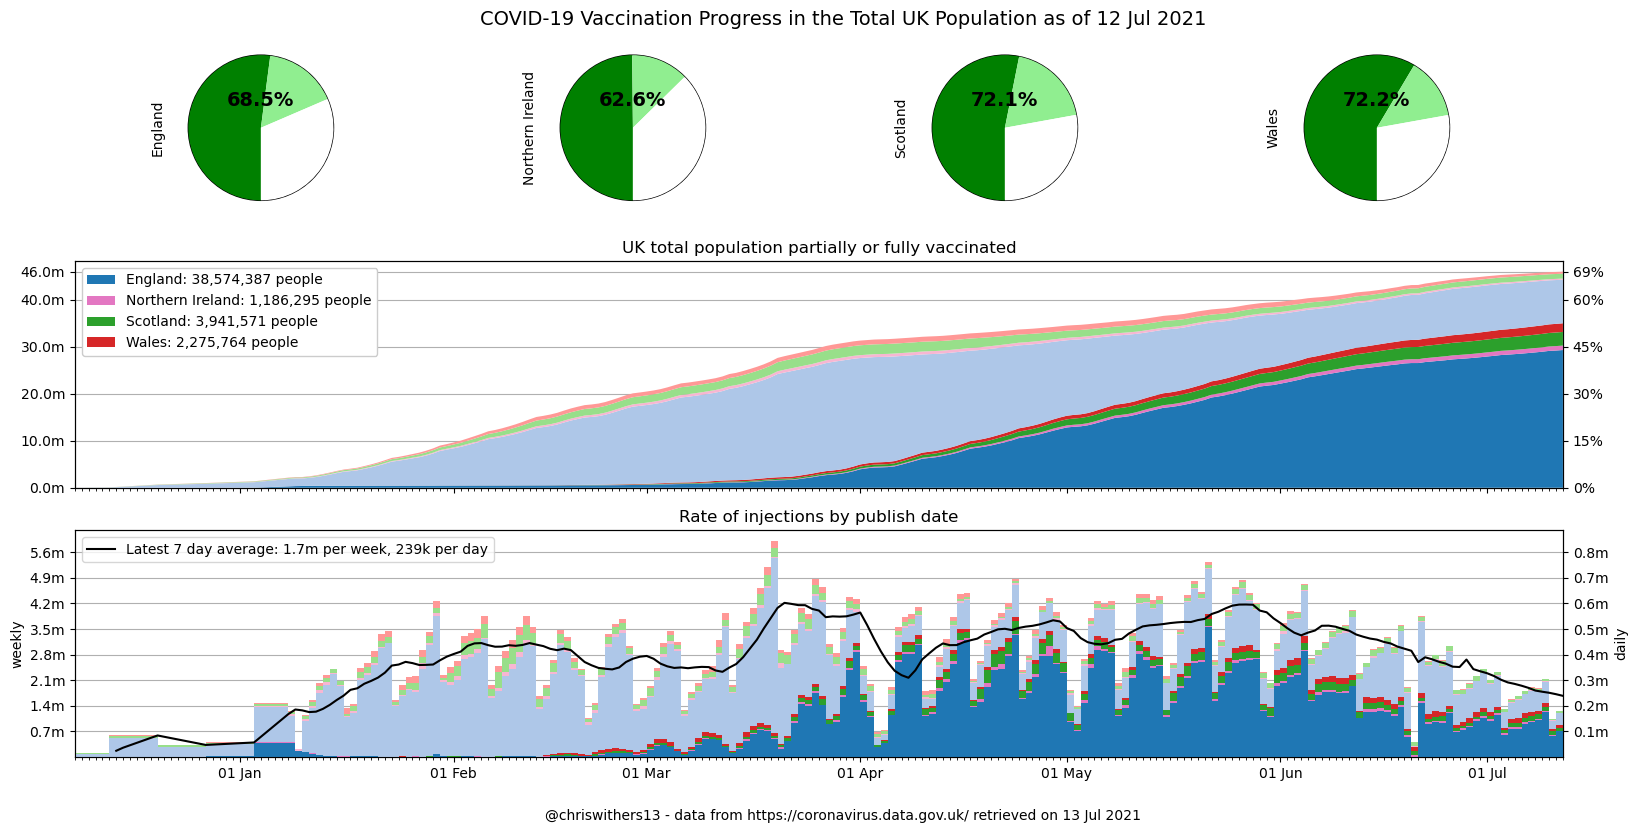

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

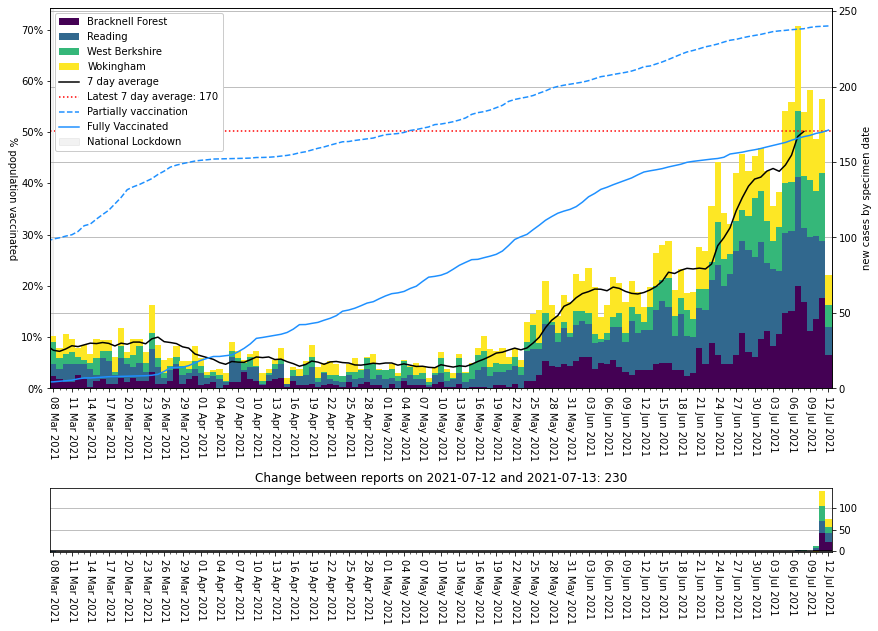

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

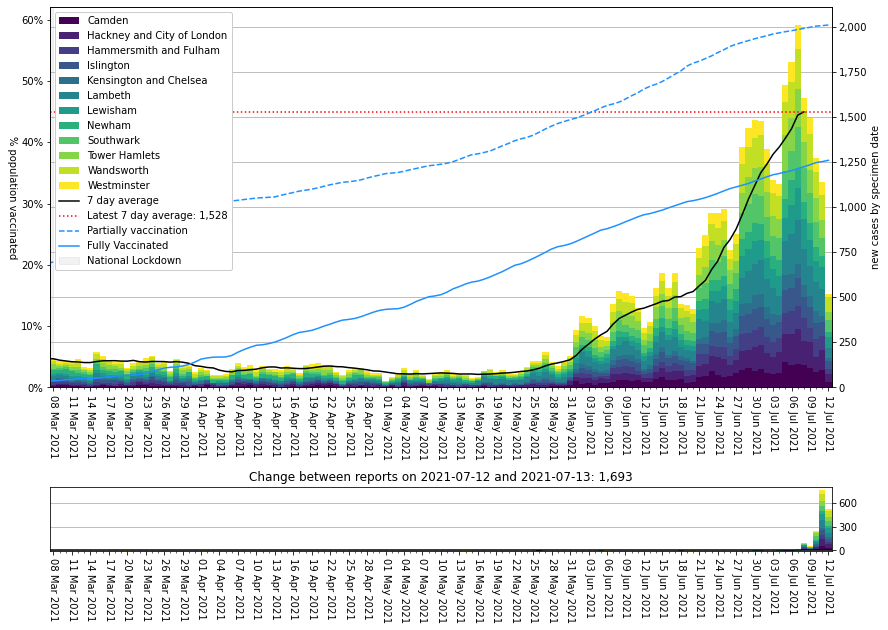

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,1188.268334,1794.0,2021-07-12
E06000001,Hartlepool,896.832260,840.0,2021-07-12
E08000024,Sunderland,880.070578,2444.0,2021-07-12
E06000002,Middlesbrough,868.917577,1225.0,2021-07-12
E06000003,Redcar and Cleveland,861.830113,1182.0,2021-07-12
E08000037,Gateshead,839.375418,1696.0,2021-07-12
E06000012,North East Lincolnshire,812.845083,1297.0,2021-07-12
E08000021,Newcastle upon Tyne,774.387425,2345.0,2021-07-12
E08000022,North Tyneside,678.649243,1411.0,2021-07-12


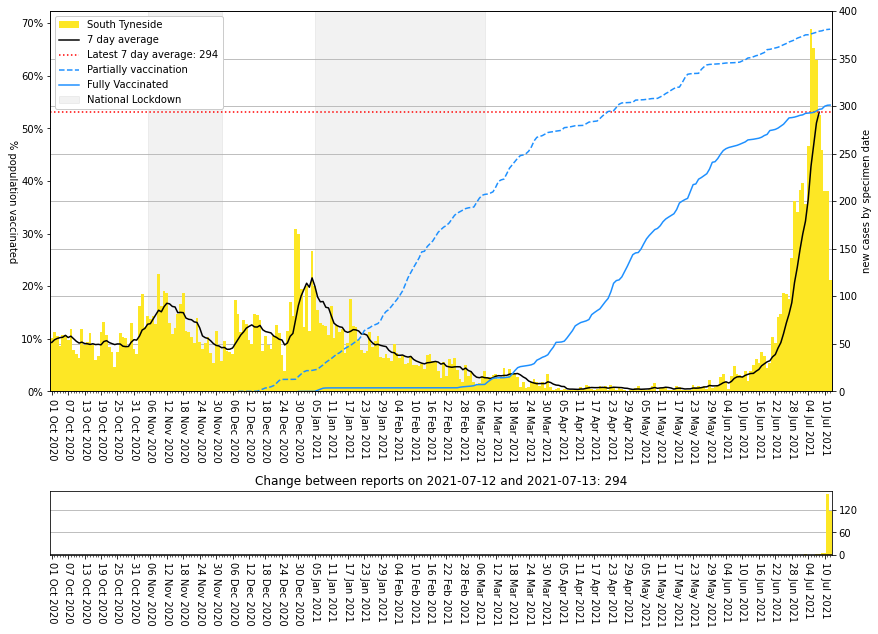

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,369.586693,4220.0,2021-07-12
E08000035,Leeds,501.299268,3976.0,2021-07-12
E06000047,County Durham,675.163273,3579.0,2021-07-12
E08000024,Sunderland,880.070578,2444.0,2021-07-12
E08000003,Manchester,432.118193,2389.0,2021-07-12
E08000021,Newcastle upon Tyne,774.387425,2345.0,2021-07-12
E06000023,"Bristol, City of",498.082555,2308.0,2021-07-12
E08000012,Liverpool,422.253545,2103.0,2021-07-12
S12000049,Glasgow City,328.847612,2082.0,2021-07-12


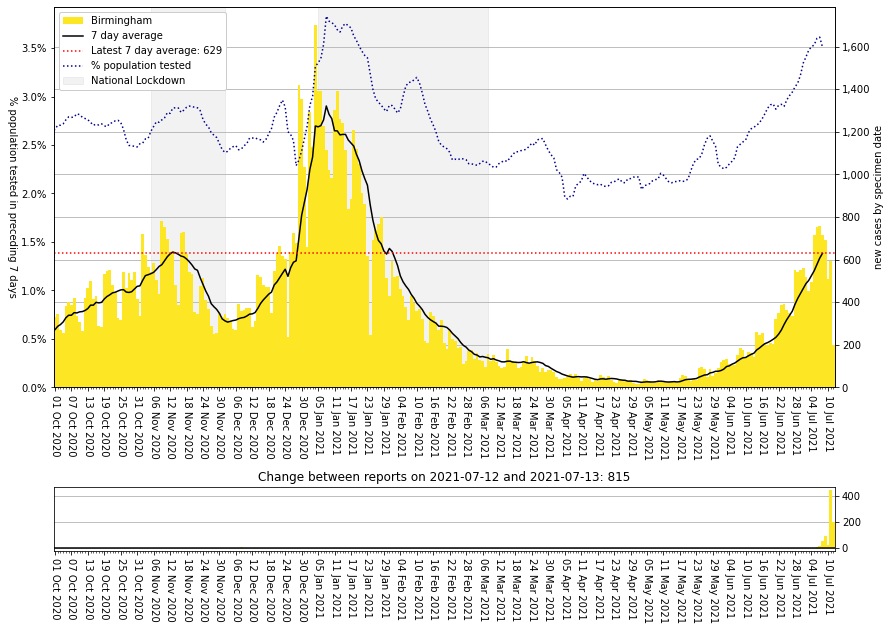

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

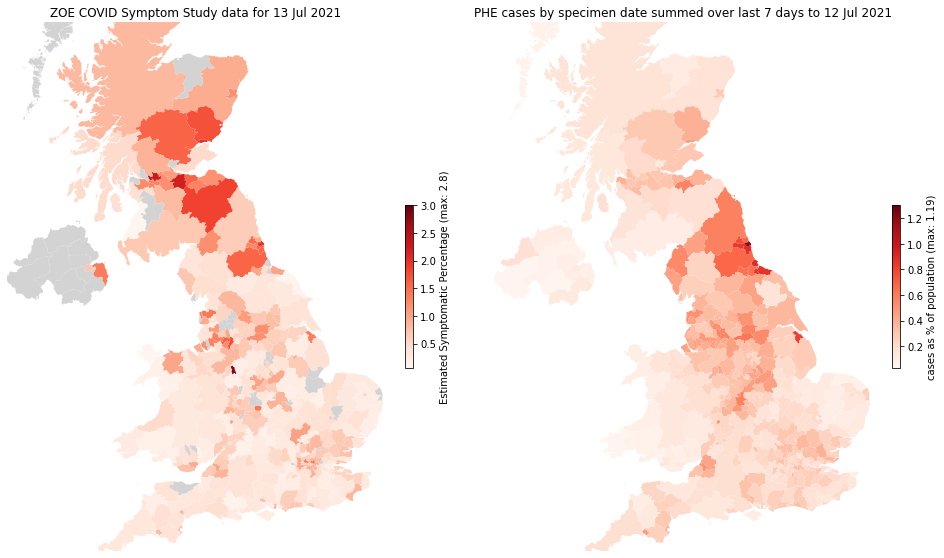

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...